

# 1st Part: EDA of Take Home Users Dataset

----

- Here, we'll do EDA on 'Take_home_users dataset"
- We will go through all the attributes of the dataset to find insights about user type and user behavior.

Objectives:
> 1. Find relation among attributes.
> 2. Check user attainment over the years.
> 3. Classify users based on their invitation source.
> 4. Classify users based on promotional email activation.
> 5. Find users with multiple user id
> 6. Find organization IDs with highest number of user invitation.

### Import required libraries
---

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msn
import warnings
import datetime as dt

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 120
warnings.filterwarnings('ignore')

### Load the dataset
---

In [3]:
# Import the data set
df1 = pd.read_csv('takehome_users.csv')
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
# shape of the data frame
df1.shape

(12000, 10)

In [5]:
# info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


### Retrieve account opening month and year 

----

In [6]:
# convert the creation_time data type from object to datetime
df1.creation_time = pd.to_datetime(df1['creation_time'])

In [7]:
# Extract year and month
df1['year'] = df1['creation_time'].dt.year
df1['month'] = df1.creation_time.dt.month

In [8]:
df1.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,2013,12
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,2012,12
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,2013,7
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,2013,11
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013,1


### Check for missing values

---

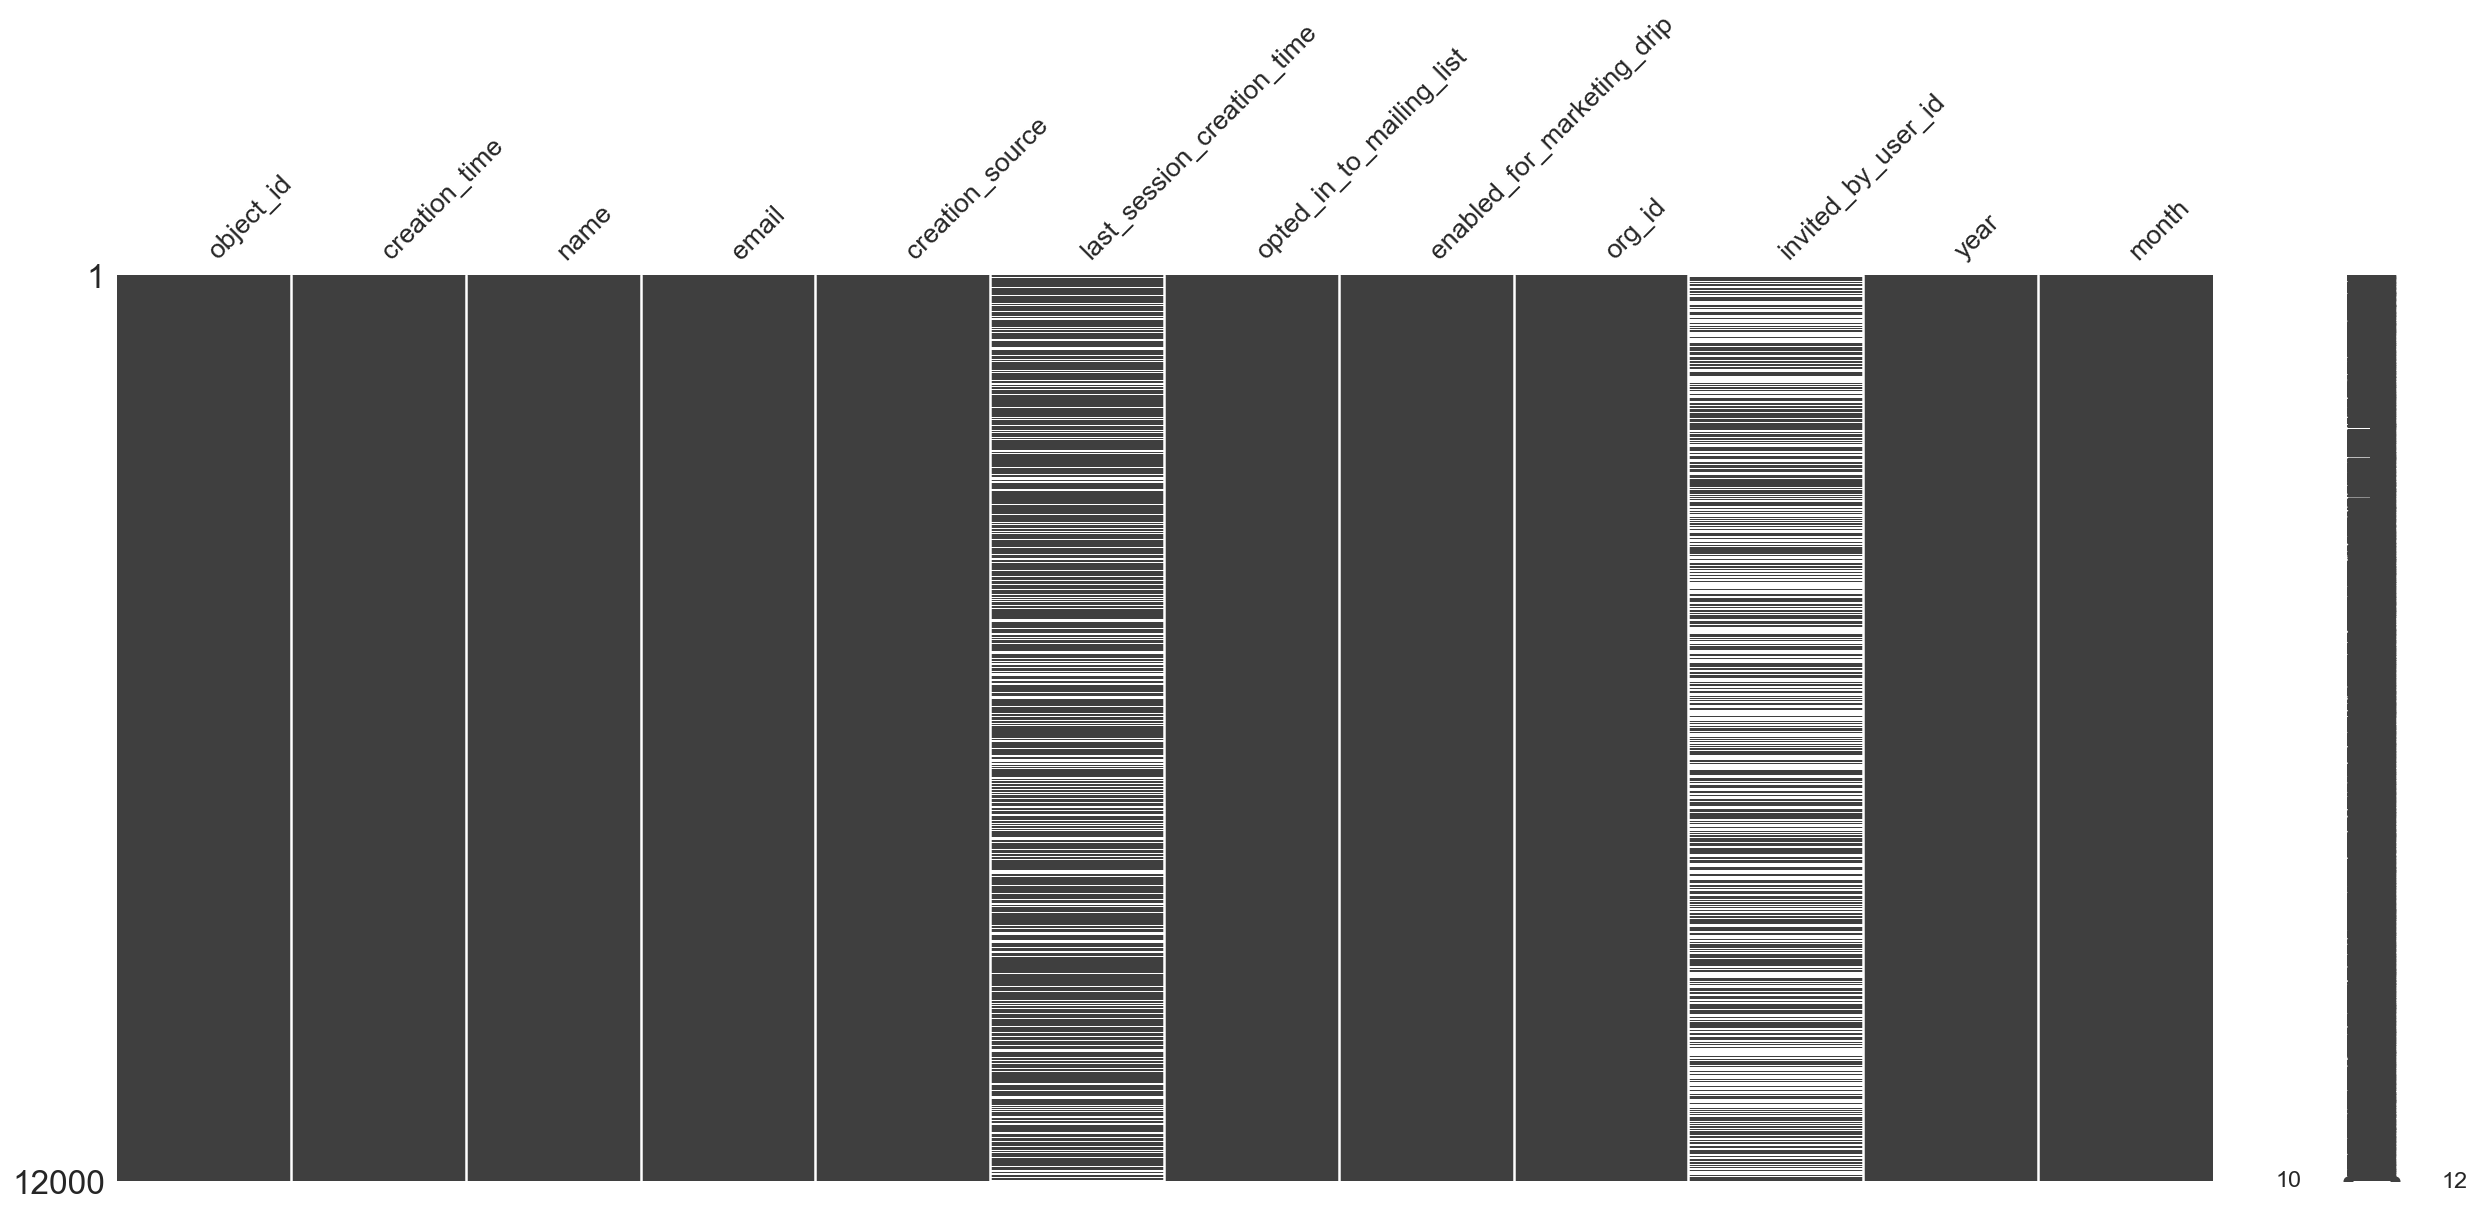

In [73]:
# missing values in the dataset
msn.matrix(df1);

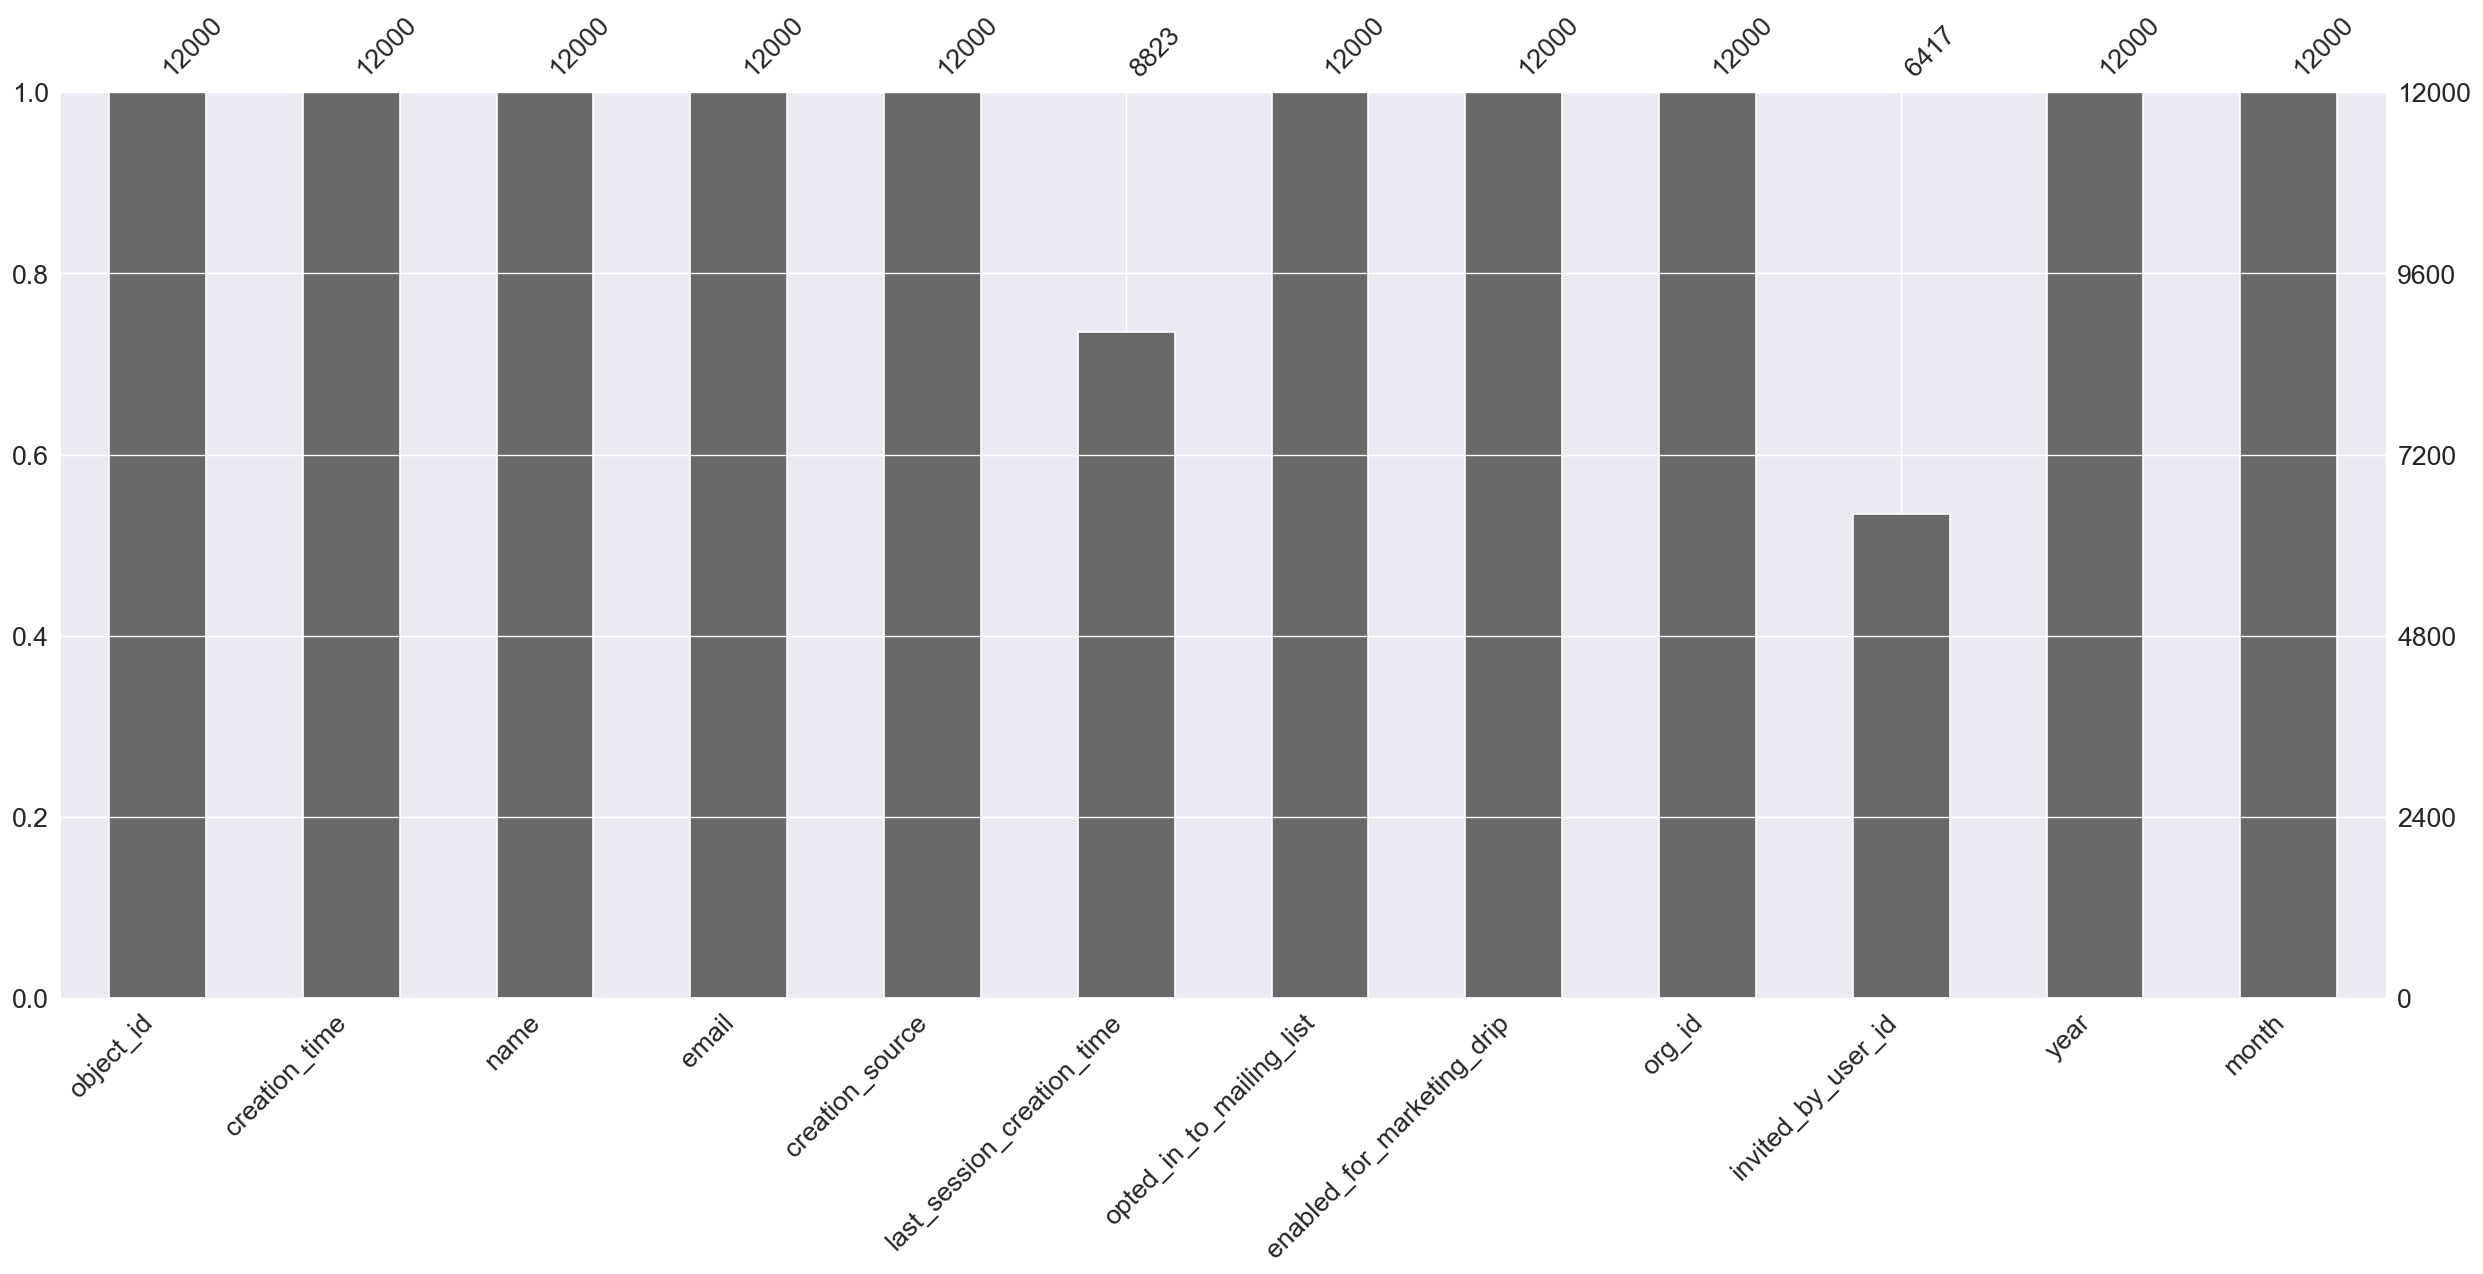

In [74]:
msn.bar(df1);

### Correlation in the dataset

----

In [75]:
df1.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000,12000.000000,12000.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145,2013.060833,6.250833
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968,0.723424,3.423968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,2012.000000,1.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000,2013.000000,3.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000,2013.000000,6.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000,2014.000000,9.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,2014.000000,12.000000


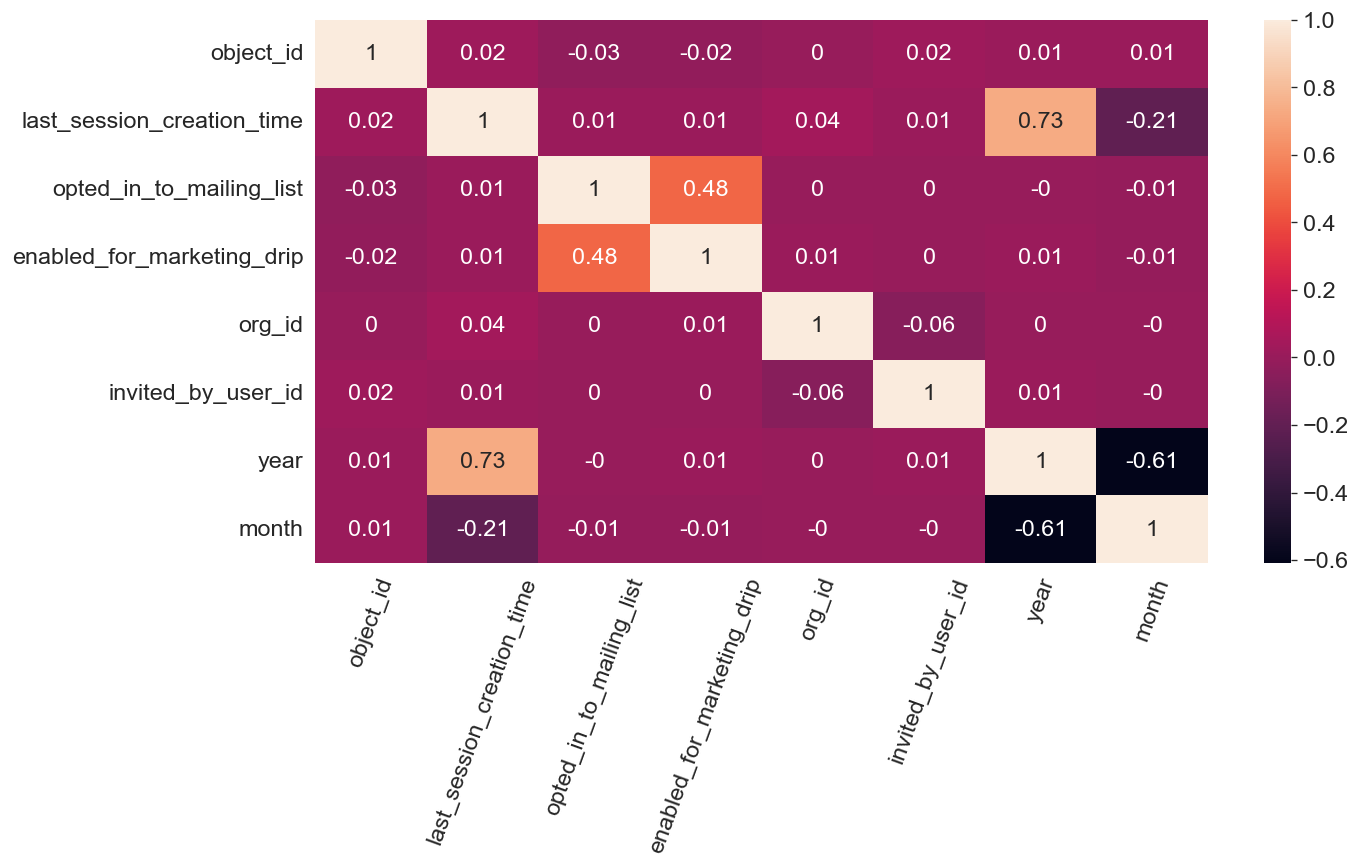

In [76]:
# plot correlation matrix plot
sns.heatmap(df1.corr().round(2), annot=True)
plt.xticks(rotation=70)
plt.show()

In [77]:
df1.year.unique()

array([2014, 2013, 2012])

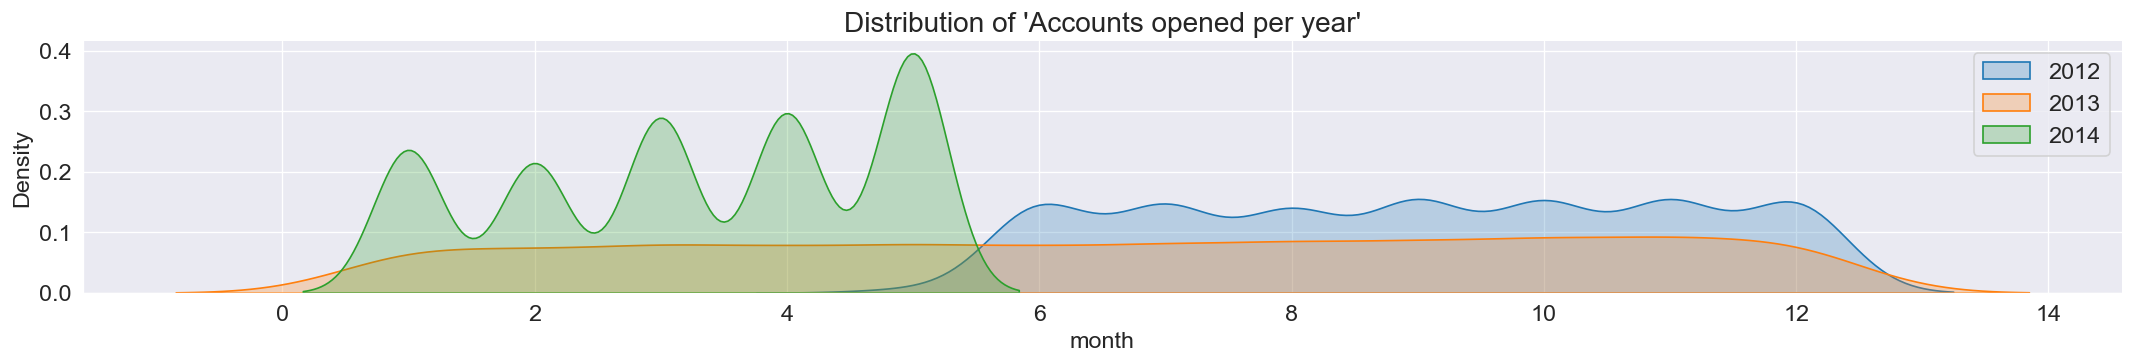

In [78]:
# Distribution of 'Accounts opened per year'
sns.FacetGrid(df1, hue='year', aspect=6).map(sns.kdeplot, 'month', shade=True)
plt.title("Distribution of 'Accounts opened per year'")
plt.legend('year',labels=[2012, 2013, 2014])
plt.show()

### Find user attainment over the years

---

In [79]:
# Number of unique values in year column
df1.year.nunique()

3

In [80]:
df1.year.unique()

array([2014, 2013, 2012])

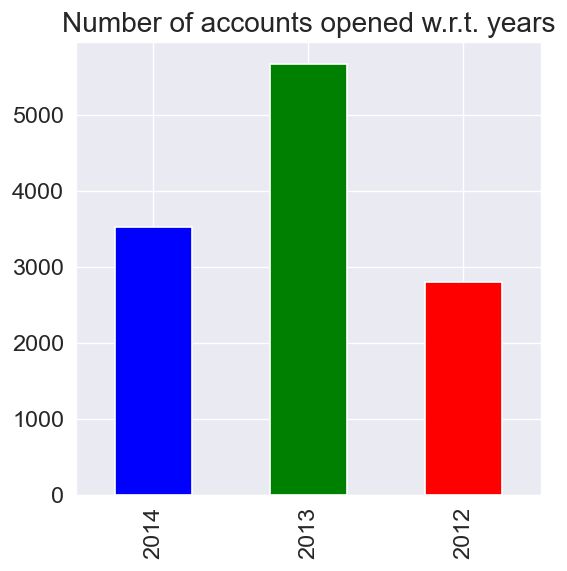

In [81]:
# Distribution of account opening w.r.t. years
df1.year.value_counts(sort=False).plot(kind='bar', color=['blue', 'green', 'red'], figsize=(5,5))
plt.title('Number of accounts opened w.r.t. years')
plt.show()

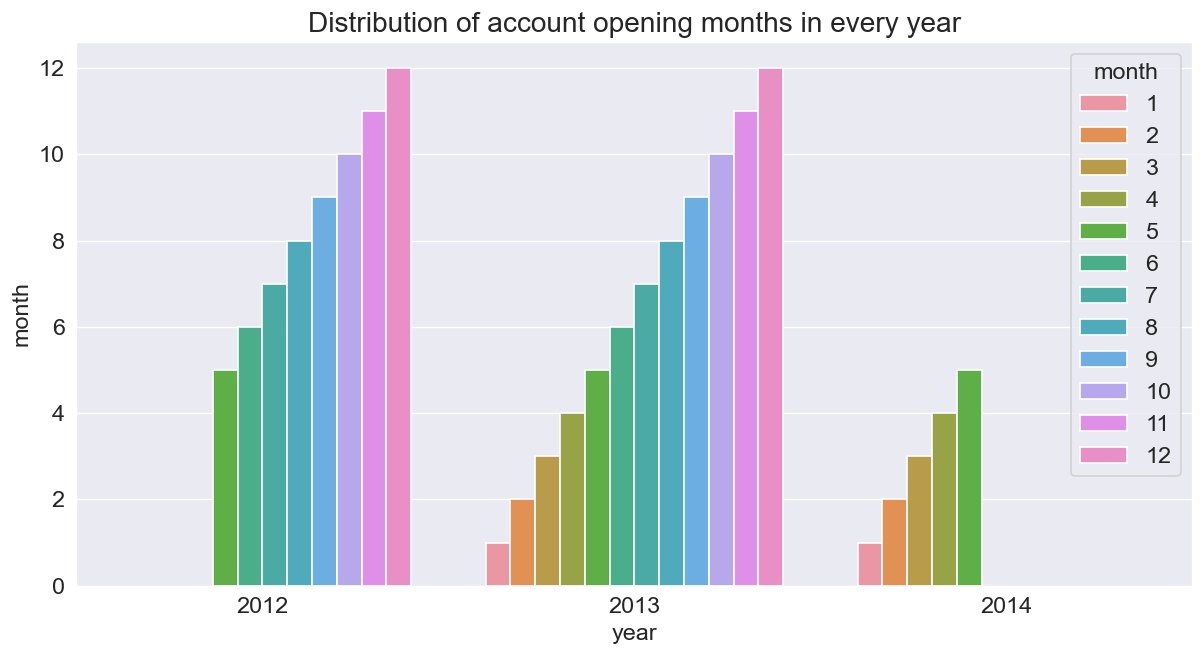

In [82]:
sns.barplot(
    x='year',
    y='month',
    hue='month',
    data=df1
)

plt.title('Distribution of account opening months in every year')
plt.show()

#### Year: 2012

In [83]:
# Accounts opened in 2012
df_2012 = df1.loc[df1.year==2012]

df_2012

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,2012,12
13,14,2012-10-11 16:14:33,Rivera Bret,BretKRivera@gmail.com,SIGNUP,1.350058e+09,0,0,0,NaN,2012,10
22,23,2012-08-17 08:30:27,Souza Alice,AliceAraujoSouza@gustr.com,ORG_INVITE,1.345279e+09,1,0,6,23.0,2012,8
36,37,2012-09-25 14:37:23,Carr-Glyn Ella,EllaCarr-Glyn@yahoo.com,SIGNUP,1.348670e+09,0,0,276,NaN,2012,9
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,2012,11
...,...,...,...,...,...,...,...,...,...,...,...,...
11972,11973,2012-10-30 03:09:47,Simmons Thomas,ThomasSimmons@gmail.com,PERSONAL_PROJECTS,NaN,0,0,52,NaN,2012,10
11973,11974,2012-12-26 16:42:08,Scott James,JamesJScott@gmail.com,SIGNUP,1.356713e+09,0,0,167,NaN,2012,12
11985,11986,2012-06-24 01:02:14,Ribeiro Clara,ClaraBarrosRibeiro@gmail.com,SIGNUP_GOOGLE_AUTH,1.341105e+09,0,0,111,NaN,2012,6
11993,11994,2012-06-05 04:46:16,Grimstone Joel,conxzghp@eaouk.com,GUEST_INVITE,NaN,0,0,84,5450.0,2012,6


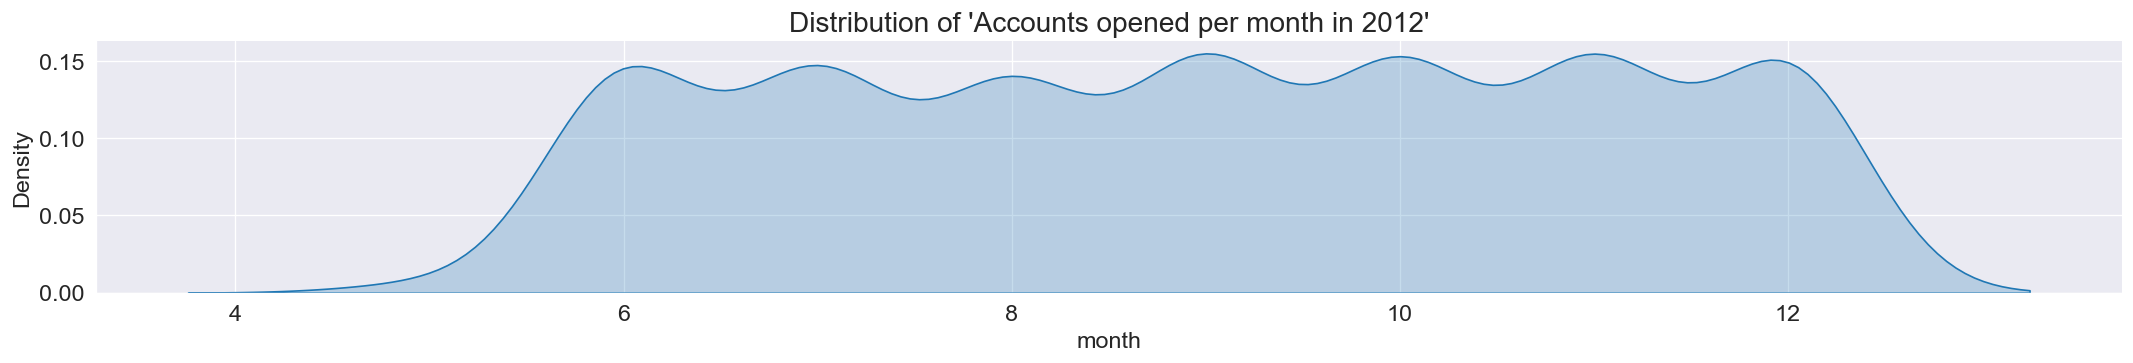

In [84]:
# Distribution of 'Accounts opened per month in 2012'
sns.FacetGrid(df_2012, hue='year', aspect=6).map(sns.kdeplot, 'month', shade=True)
plt.title("Distribution of 'Accounts opened per month in 2012'")
plt.show()

In [85]:
# Accounts opened in 2012 per month
avg_2012 = df_2012.month.value_counts().to_frame().reset_index()
avg_2012.rename(columns={'month':'total_accounts_opened', 'index':'month'}, inplace=True)
avg_2012['percentage'] = avg_2012.total_accounts_opened/df_2012.shape[0] * 100

avg_2012

,month,total_accounts_opened,percentage
0,12,412,14.730068
1,9,409,14.622810
2,11,406,14.515552
3,10,401,14.336789
4,6,401,14.336789
5,7,387,13.836253
6,8,365,13.049696
7,5,16,0.572041


In [86]:
# Avg customer acquired per month in 2012
avgAcquisition2012 = avg_2012.percentage.sum()/avg_2012.month.nunique()
avgAcquisition2012

12.5

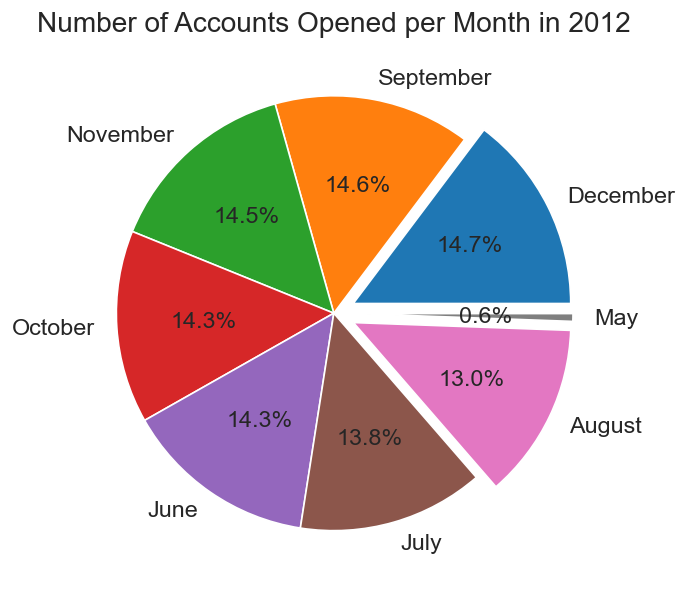

In [87]:
label = ['December', 'September', 'November','October', 'June', 'July', 'August', 'May']
df_2012.month.value_counts().plot(kind='pie', labels=label, autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0, 0, 0.1, 0.1))
plt.ylabel('')
plt.title('Number of Accounts Opened per Month in 2012')
plt.show()

#### Year: 2013

In [88]:
# Number of accounts opened in 2013
df_2013 = df1.loc[df1.year==2013]

df_2013

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,2013,12
...,...,...,...,...,...,...,...,...,...,...,...,...
11989,11990,2013-07-05 21:00:48,Juhl Aase,AasePJuhl@jourrapide.com,ORG_INVITE,1.373144e+09,0,0,25,3944.0,2013,7
11992,11993,2013-03-28 23:24:21,Townsend Isabel,IsabelTownsend@cuvox.de,PERSONAL_PROJECTS,NaN,0,0,281,NaN,2013,3
11994,11995,2013-10-21 13:33:17,Werfel Sebastian,SebastianWerfel@gmail.com,PERSONAL_PROJECTS,1.382449e+09,0,0,0,NaN,2013,10
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,2013,9


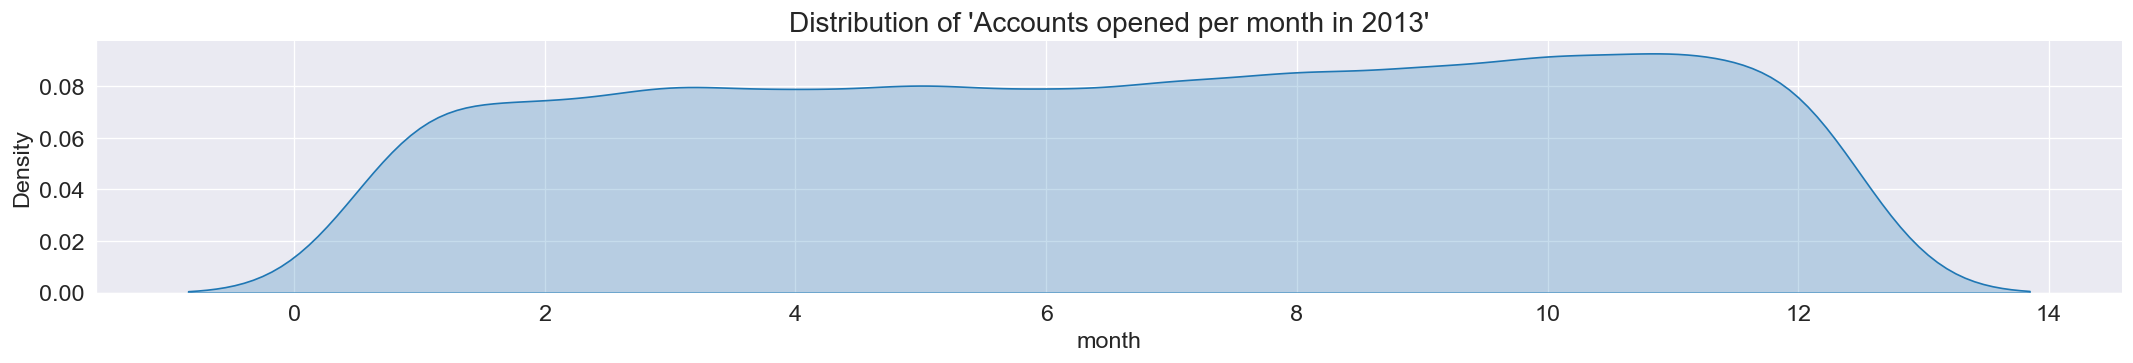

In [89]:
# Distribution of 'Accounts opened per month in 2013'
sns.FacetGrid(df_2013, hue='year', aspect=6).map(sns.kdeplot, 'month', shade=True)
plt.title("Distribution of 'Accounts opened per month in 2013'")
plt.show()

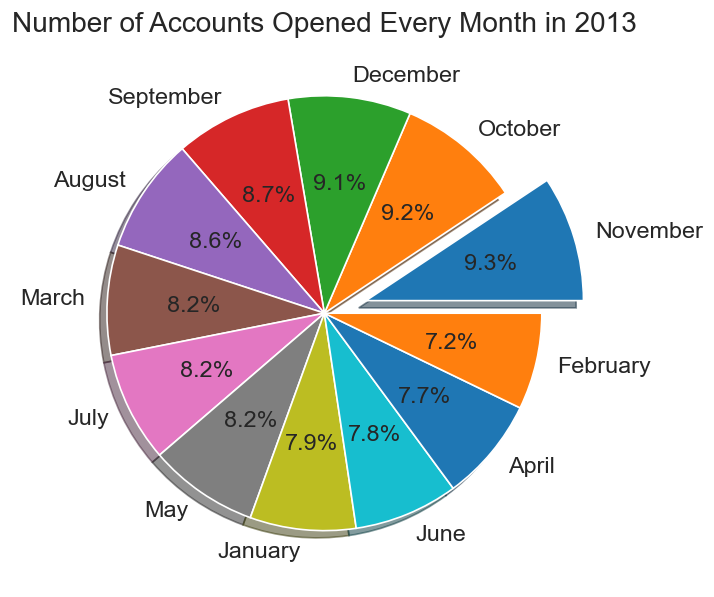

In [90]:
label = ['November', 'October', 'December', 'September', 'August', 'March', 'July', 'May', 'January', 'June', 'April', 'February']
df_2013.month.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(0.2, 0, 0, 0, 0,0,0,0,0,0,0,0), shadow=True, labels=label)
plt.title('Number of Accounts Opened Every Month in 2013')
plt.ylabel('')
plt.show()

In [91]:
avg2013 = df_2013.month.value_counts(sort=False).to_frame().reset_index()
avg2013.rename(columns={'month':'total_accounts_opened', 'index':'month'}, inplace=True)

avg2013['percentage'] = (avg2013.total_accounts_opened/df_2013.shape[0]) * 100

avg2013

,month,total_accounts_opened,percentage
0,11,530,9.337562
1,3,465,8.192389
2,5,463,8.157153
3,1,447,7.875264
4,12,518,9.126145
5,7,465,8.192389
6,2,407,7.170543
7,8,487,8.579986
8,9,492,8.668076
9,6,440,7.751938


In [92]:
fig = px.bar(
    avg2013,
    x='month',
    y='total_accounts_opened',
    text_auto=True,
    title='Number of Accounts Opened in 2013',
    labels={'total_accounts_opened':'Total Number of Accounts', 'month':'Month'},
    color='month'
)

fig.update_layout(title={'x':0.1}, title_font={'family':'Verdana', 'size':24})
fig.show()

In [93]:
# Avg customer acquisition per month in 2013 
avgCustomerAcquisition2013 = avg2013.percentage.sum()/avg2013.month.nunique()
avgCustomerAcquisition2013.round(2)

8.33

#### Year: 2014

In [94]:
# Accounts opened in 2014
df_2014 = df1.loc[df1.year==2014]

df_2014

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
11,12,2014-04-17 23:48:38,Mathiesen L�rke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaN,0,0,130,9270.0,2014,4
12,13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,1.396196e+09,0,0,254,11204.0,2014,3
16,17,2014-04-09 14:39:38,Reynolds Anthony,AnthonyReynolds@jourrapide.com,GUEST_INVITE,1.397314e+09,1,0,175,1600.0,2014,4
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
11987,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,2014,3
11990,11991,2014-04-20 14:22:45,Vaughn Arthur,ArthurJVaughn@gmail.com,SIGNUP_GOOGLE_AUTH,1.401460e+09,0,0,388,NaN,2014,4
11991,11992,2014-04-09 19:39:56,Hermansen Amanda,AmandaAHermansen@yahoo.com,PERSONAL_PROJECTS,1.397245e+09,0,0,129,NaN,2014,4
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,2014,4


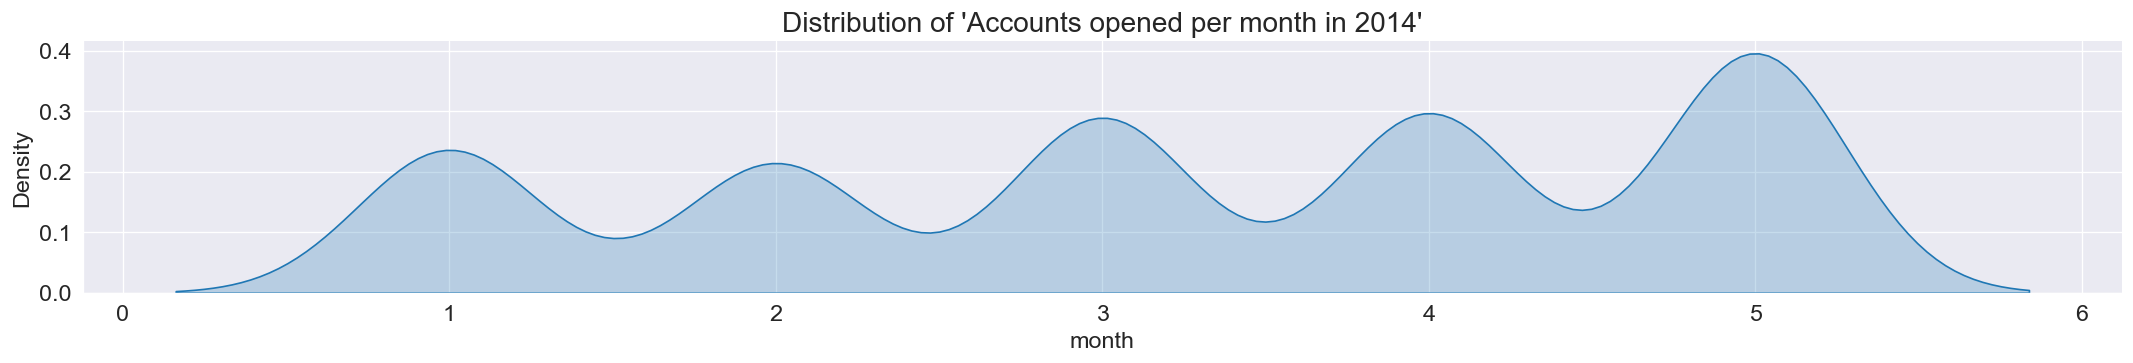

In [95]:
# Distribution of 'Accounts opened per month in 2014'
sns.FacetGrid(df_2014, hue='year', aspect=6).map(sns.kdeplot, 'month', shade=True)
plt.title("Distribution of 'Accounts opened per month in 2014'")
plt.show()

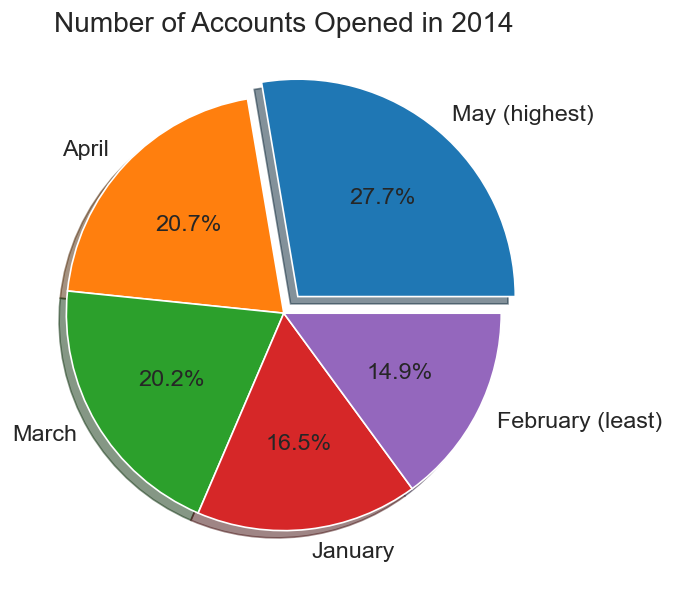

In [96]:
label = ['May (highest)', 'April', 'March', 'January', 'February (least)']
df_2014.month.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(0.1, 0, 0, 0,0), shadow=True, labels=label)
plt.title('Number of Accounts Opened in 2014')
plt.ylabel('')
plt.show()

In [97]:
# Average accounts opened in 2014 per month
avg2014 = df_2014.month.value_counts(sort=False).to_frame().reset_index()
avg2014.rename(columns={'month':'total_accounts_opened', 'index':'month'}, inplace=True)
avg2014['percentage'] = avg2014.total_accounts_opened/df_2014.shape[0] * 100

avg2014

,month,total_accounts_opened,percentage
0,4,730,20.697477
1,3,712,20.187128
2,2,527,14.941877
3,1,582,16.501276
4,5,976,27.672243


In [98]:
# Avg accounts opened in 2014
avgAcquisition2014 = avg2014.percentage.sum()/avg2014.month.nunique()
avgAcquisition2014

20.0

In [99]:
# Total average accounts opened per month and per year 
total_avg = pd.DataFrame({
    'year':[2012, 2013, 2014],
    'avg_accounts_opened_per_month':[round(avgAcquisition2012,2), round(avgCustomerAcquisition2013,2), round(avgAcquisition2014,2)],
    'avg_accounts_opened_per_year':[round((df_2012.shape[0]/df1.shape[0]*100),2), round((df_2013.shape[0]/df1.shape[0] * 100),2), round((df_2014.shape[0]/df1.shape[0] * 100),2)]
})

total_avg

,year,avg_accounts_opened_per_month,avg_accounts_opened_per_year
0,2012,12.50,23.31
1,2013,8.33,47.30
2,2014,20.00,29.39


In [100]:
# Average accounts opened per month
fig = px.bar(
    total_avg,
    x='year',
    y=['avg_accounts_opened_per_month', 'avg_accounts_opened_per_year'],
    text_auto=True,
    title='Average Account Opened in Every Year',
    template='ggplot2'
)
fig.update_layout(
    height=600,
    width=900,
    title=dict(
        x=0.08,
        y=0.95,
        font= dict(
            size=30,
            family='Time New Roman'
        )
    )
)

fig.show()

### Month over month growth


----

In [9]:
month_wise = df1.groupby(['year','month']).month.count().reset_index(name='total')
month_wise

,year,month,total
0,2012,5,16
1,2012,6,401
2,2012,7,387
3,2012,8,365
4,2012,9,409
5,2012,10,401
6,2012,11,406
7,2012,12,412
8,2013,1,447
9,2013,2,407


In [16]:
# Overall growth
mom = month_wise.loc[(month_wise.year==2014) & (month_wise.month==5)]['total']/month_wise.drop(24,axis=0).total.values.sum() * 100
mom.round(3)

24    8.853
Name: total, dtype: float64

### Users vs Creation Source

-----------

In [101]:
df1.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,2013,12
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,2012,12
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,2013,7
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,2013,11
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013,1


In [102]:
# Percentage of users opened an account through invitation
df1.invited_by_user_id.isna().sum()/df1.shape[0] * 100

46.525

In [103]:
# Types of invitation
account_opening_reasons =df1.creation_source.value_counts().to_frame().reset_index()
account_opening_reasons.rename(columns={'creation_source':'total', 'index':'creation_source'}, inplace=True)
account_opening_reasons['percentage'] = np.round(account_opening_reasons.total/df1.shape[0]*100,2)
account_opening_reasons

,creation_source,total,percentage
0,ORG_INVITE,4254,35.45
1,GUEST_INVITE,2163,18.02
2,PERSONAL_PROJECTS,2111,17.59
3,SIGNUP,2087,17.39
4,SIGNUP_GOOGLE_AUTH,1385,11.54


In [104]:
fig = px.bar(
    account_opening_reasons,
    x='creation_source',
    y='total',
    title='Account Opening Type w.r.t. Creation Source',
    text_auto=True,
    #template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    height=600,
    width=1000,
    title=dict(
        font=dict(
            size=30,
            family='Time New Roman'
        )
    )
)

fig.show()

In [105]:
account_opening_reasons.creation_source.to_list()

['ORG_INVITE',
 'GUEST_INVITE',
 'PERSONAL_PROJECTS',
 'SIGNUP',
 'SIGNUP_GOOGLE_AUTH']

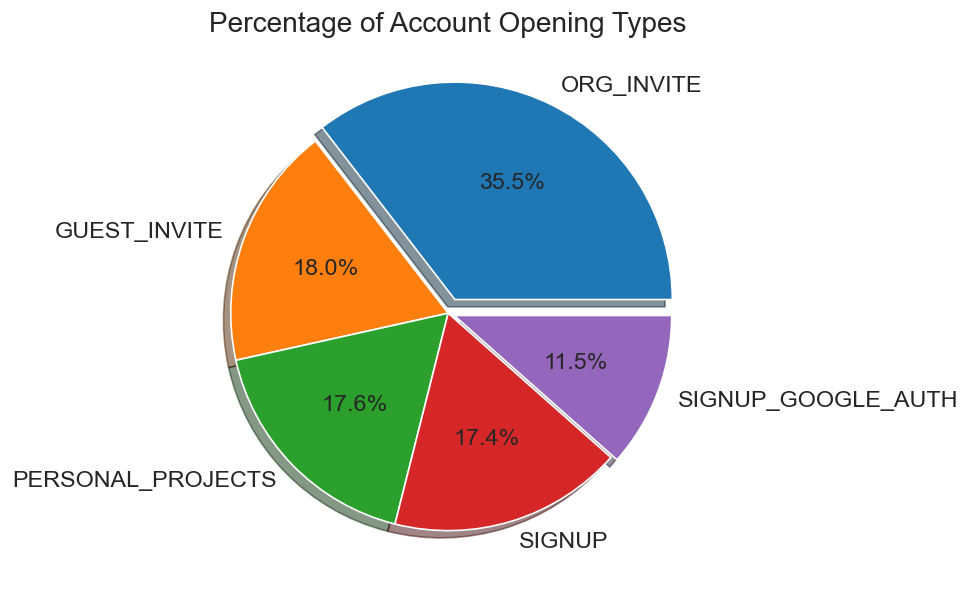

In [106]:
account_opening_reasons.percentage.plot(kind='pie', autopct='%1.1f%%', labels=account_opening_reasons.creation_source.to_list(), explode=(.07, 0, 0, 0, 0.03), shadow=True)
plt.ylabel('')
plt.title('Percentage of Account Opening Types')
plt.show()

### Classify users based on obtaining for promotional email and on regular product drip

-------------

In [107]:
df1.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'year',
       'month'],
      dtype='object')

In [108]:
mailing_list = df1.opted_in_to_mailing_list.value_counts().to_frame().reset_index()
mailing_list.rename(columns={'opted_in_to_mailing_list':'total', 'index':'opted_in_to_mailing_list'}, inplace=True)
mailing_list.opted_in_to_mailing_list.replace({0:'Not-Opted',1:'Opted'}, inplace=True)
mailing_list['percentage'] = round(mailing_list.total / df1.shape[0] * 100, 2)
mailing_list

,opted_in_to_mailing_list,total,percentage
0,Not-Opted,9006,75.05
1,Opted,2994,24.95


In [109]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
    x=mailing_list.opted_in_to_mailing_list,
    y=mailing_list.total,
)])

fig.update_traces(
    text=mailing_list.total, 
    textposition='inside', 
    marker_color=['red', 'green']
)

fig.update_layout(title_text='Number of Consumers opted for mailing list', width=500, height=500, title_font={'family':'Time New Roman', 'size':24})
fig.show()

In [110]:
df1.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'year',
       'month'],
      dtype='object')

In [111]:
email_opted = df1[df1.opted_in_to_mailing_list==1]
email_opted.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,2013,7
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013,1
16,17,2014-04-09 14:39:38,Reynolds Anthony,AnthonyReynolds@jourrapide.com,GUEST_INVITE,1.397314e+09,1,0,175,1600.0,2014,4
18,19,2013-05-24 14:56:36,Collins Arlene,ArleneRCollins@gmail.com,SIGNUP,1.369926e+09,1,0,0,NaN,2013,5


In [112]:
email_opted.shape

(2994, 12)

#### Users enabled for marketing drip

In [113]:
# Users enabled for marketing drip
df1.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [114]:
# percentage of users enabled regular marketing drip
round(df1.enabled_for_marketing_drip.value_counts()[1] / df1.shape[0] * 100, 2)

14.93

In [115]:
# Users opted for mailing list and enabled marketing drip
email_opted.enabled_for_marketing_drip.value_counts()

0    1652
1    1342
Name: enabled_for_marketing_drip, dtype: int64

In [116]:
# percentage of users enabled for marketing drip who had also opted to receive promotional mail
round(email_opted.enabled_for_marketing_drip.value_counts()[1] / email_opted.shape[0] * 100, 2)

44.82

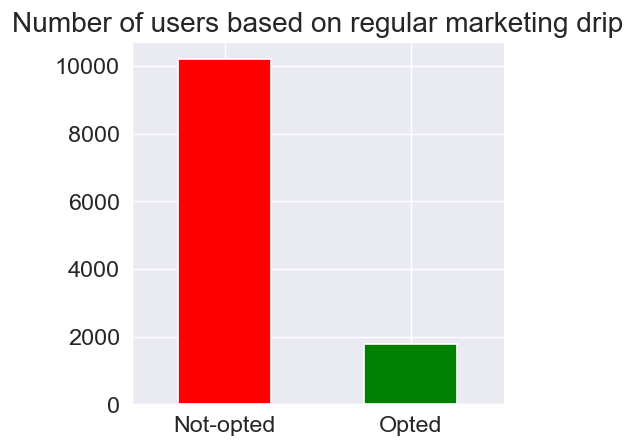

In [117]:
fig = plt.figure(figsize=(4,4))
df1.enabled_for_marketing_drip.value_counts().plot(kind='bar', color=['r','g'])
plt.xticks([0,1],['Not-opted', 'Opted'], rotation=0)
plt.title('Number of users based on regular marketing drip')
plt.show()

### Organization IDs with highest invitation
--------------

In [118]:
# Is the column 'org_id' has null value?
df1.org_id.isna().sum()

0

N.B:

All the null values are assigned to 0

In [119]:
# total number of org-ids 
df1.org_id.nunique() -1 # -1 for 0

416

In [120]:
# organization Id
df1.org_id.value_counts().sort_values(ascending=False).head(11)[1:]

1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
8      97
Name: org_id, dtype: int64

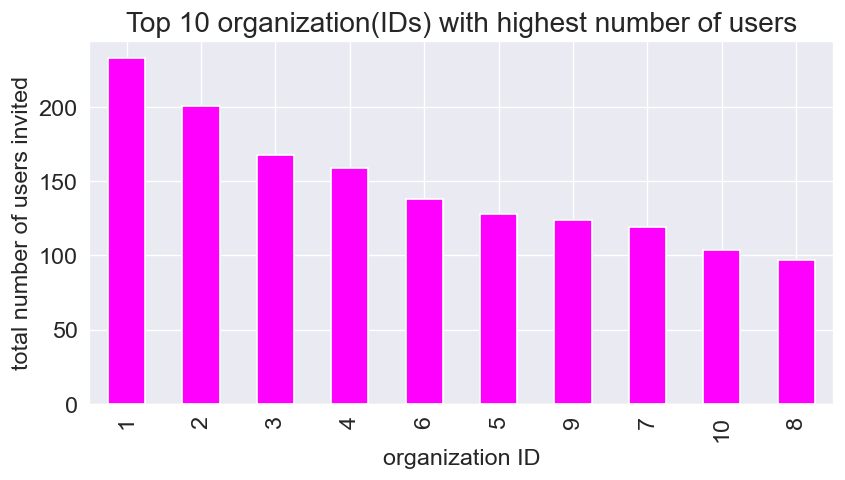

In [121]:
df1.org_id.value_counts().sort_values(ascending=False)[1:11].plot(kind='bar', figsize=(8,4), color='magenta')
plt.xlabel('organization ID')
plt.ylabel('total number of users invited')
plt.title("Top 10 organization(IDs) with highest number of users");

In [122]:
# Number of non-invited users
df1.org_id.value_counts()[0]

319

### Invited by user id

In [123]:
df1.head(15)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013,1
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,2013,12
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,2012,12
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,2013,7
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,2013,11
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,2013,1


In [124]:
df1.invited_by_user_id = df1.invited_by_user_id.astype(np.float).astype('int32', errors='ignore')

In [125]:
df1.invited_by_user_id.head()

0    10803.0
1      316.0
2     1525.0
3     5151.0
4     5240.0
Name: invited_by_user_id, dtype: float64

In [126]:
df1.invited_by_user_id.isna().any()

True

In [127]:
df1.invited_by_user_id.value_counts().head(15)

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
7012.0     10
4803.0     10
6370.0     10
4302.0     10
1175.0     10
10628.0    10
10481.0    10
2354.0     10
8068.0     10
4612.0     10
Name: invited_by_user_id, dtype: int64

In [128]:
df1.loc[df1.object_id==2527]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
2526,2527,2012-06-18 02:45:04,Ribeiro Diego,DiegoRochaRibeiro@gustr.com,PERSONAL_PROJECTS,1.340420e+09,0,0,57,NaN,2012,6


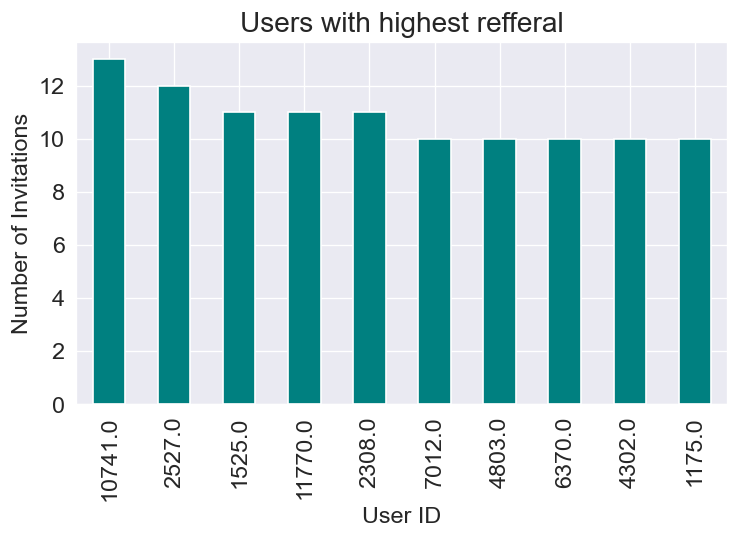

In [129]:
df1.invited_by_user_id.value_counts().head(10).plot(kind='bar', color='teal', figsize=(7,4))
plt.xlabel('User ID')
plt.ylabel('Number of Invitations')
plt.title("Users with highest refferal");


### Check for Users with multiple account

-------------

In [130]:
df1.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'year',
       'month'],
      dtype='object')

In [131]:
# check duplicate
df1.duplicated().sum()

0

In [132]:
df1.duplicated('name').any()

True

In [133]:
df1.object_id.nunique()

12000

In [134]:
df1.name.nunique() # Total unique values in name column

11349

In [135]:
# Total duplicate values in name column 
df1.duplicated('name').sum()

651

In [136]:
duplicate = df1[df1.duplicated('name')]
duplicate

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,year,month
805,806,2013-10-14 17:03:01,Oliveira Jo�o,JoaoCorreiaOliveira@yahoo.com,PERSONAL_PROJECTS,NaN,0,0,250,NaN,2013,10
867,868,2013-06-15 11:44:24,Azevedo Clara,ClaraAraujoAzevedo@jourrapide.com,PERSONAL_PROJECTS,NaN,0,0,278,NaN,2013,6
885,886,2013-11-10 12:34:07,Araujo Gabriela,GabrielaCorreiaAraujo@jourrapide.com,ORG_INVITE,1.384087e+09,0,0,54,4118.0,2013,11
917,918,2012-11-23 06:32:45,Araujo Gabriela,GabrielaDiasAraujo@cuvox.de,SIGNUP,1.353652e+09,1,0,40,NaN,2012,11
974,975,2012-08-17 08:11:56,Araujo Bianca,BiancaFerreiraAraujo@cuvox.de,GUEST_INVITE,1.345796e+09,1,1,179,7479.0,2012,8
...,...,...,...,...,...,...,...,...,...,...,...,...
11927,11928,2013-09-15 11:40:48,Gerber Johanna,JohannaGerber@yahoo.com,GUEST_INVITE,1.379764e+09,0,0,52,11973.0,2013,9
11931,11932,2014-01-18 07:28:55,Simonsen Jonathan,JonathanSSimonsen@gmail.com,GUEST_INVITE,1.390030e+09,0,0,181,5369.0,2014,1
11933,11934,2013-02-18 13:43:13,Castro Matheus,MatheusMeloCastro@hotmail.com,ORG_INVITE,1.361195e+09,1,1,292,4458.0,2013,2
11943,11944,2012-12-06 13:17:37,Bach Silas,SilasABach@gmail.com,SIGNUP_GOOGLE_AUTH,1.354800e+09,0,0,411,NaN,2012,12


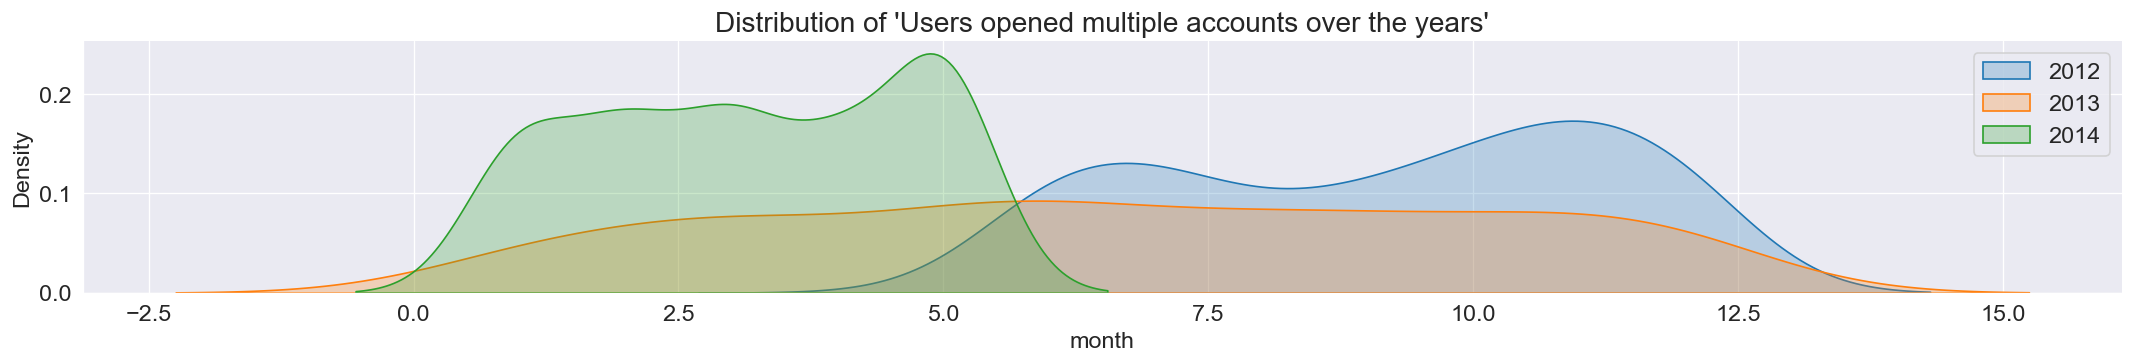

In [137]:
# Distribution of 'Accounts opened per month in 2014'
sns.FacetGrid(duplicate, hue='year', aspect=6).map(sns.kdeplot, 'month', shade=True)
plt.title("Distribution of 'Users opened multiple accounts over the years'")
plt.legend(labels=[2012, 2013, 2014])
plt.show()

In [138]:
# Total unique values in the email column
df1.email.nunique()

11980

In [139]:
df1['time'] = df1.creation_time.dt.strftime('%H.%M')


In [141]:
df1['time']= df1.time.astype('float')

In [143]:
# save the dataframe
df1.to_csv('takehome_users_clean_1.csv')

## Insights from the Users Dataset

----
1. The users dataset contains 12000 unique user IDs that have been created in between May-2012 to May-2014.
2. User attainment has increased over the years with a mom growth rate of 8.53%. The correlation between last_session_creation_time vs year has a positive correlation of 0.73. 
3. Highest number of users were joined through organization invitation (35.45%), followed by guest invitation (18.02%), personal project(17.59%). The rest users were joined themselves by signing up 17.39% and through Google 11.54%.
4. Out of 12000 unique user IDs, only 2994 (24.95%) had opted to receive promotional emails, out of which 1342 (44.82%) had enabled for marketing drip. Where as, in general, total 1792 users (14.93% only) had enabled marketing drip.
5. There are 651 users with multiple user ID and 20 duplicate email IDs






# Second Part: EDA of Take Home Users Engagement Dataset
_____

- EDA of 'Take_Home_Users_Engagement dataset'
- Here, we have to find the adopted users.
- We'll also create the final dataset with a new attribute "User Type" denoting whether the user is adopted or not.


Objectives:
> 1. Find the percentage of active users.
> 2. Find percentage of adopted users.
> 3. Process and clean the dataset

### Import required libraries
-------

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import datetime as dt


%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 120
warnings.filterwarnings('ignore')

### Load the dataset

---

In [19]:
df2 = pd.read_csv('takehome_user_engagement.csv')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


### Find information about the dataset

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


### Find the year-week combination from user login timestamp

----

In [21]:
# Convert time stamp column to date time format
df2.time_stamp = pd.to_datetime(df2.time_stamp)

In [22]:
# Extracting year-week combination for every date
df2['year_week'] = df2['time_stamp'].dt.strftime("%Y-%U")



In [36]:
# time
df2['time'] = df2['time_stamp'].dt.strftime('%H.%M')
# year
df2['year'] = df2['time_stamp'].dt.year
# month
df2['month'] = df2['time_stamp'].dt.month

In [37]:
df2

,time_stamp,user_id,visited,year_week,time,year,month
0,2014-04-22 03:53:30,1,1,2014-16,03.53,2014,4
1,2013-11-15 03:45:04,2,1,2013-45,03.45,2013,11
2,2013-11-29 03:45:04,2,1,2013-47,03.45,2013,11
3,2013-12-09 03:45:04,2,1,2013-49,03.45,2013,12
4,2013-12-25 03:45:04,2,1,2013-51,03.45,2013,12
...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013-35,06.14,2013,9
207913,2013-01-15 18:28:37,11997,1,2013-02,18.28,2013,1
207914,2014-04-27 12:45:16,11998,1,2014-17,12.45,2014,4
207915,2012-06-02 11:55:59,11999,1,2012-22,11.55,2012,6


In [38]:
df2.year_week.value_counts()

2014-19    4809
2014-20    4804
2014-18    4747
2014-17    4663
2014-16    4483
           ... 
2012-27     123
2012-25      96
2012-24      95
2012-23      72
2012-22      19
Name: year_week, Length: 108, dtype: int64

### Find adopted users 

-----

- Adopted users are the users who had logged in more than 3 times in a week.

In [49]:
# Find Frequency of users login time
df3 = df2.groupby(['year_week','user_id','time'])['time_stamp'].count().reset_index(name="freq")
df3.head(10)

,year_week,user_id,time,freq
0,2012-22,1693,21.58,1
1,2012-22,1995,13.14,1
2,2012-22,2120,21.42,1
3,2012-22,3428,15.47,1
4,2012-22,3514,00.28,1
5,2012-22,3721,09.08,1
6,2012-22,4584,06.37,1
7,2012-22,6102,00.17,1
8,2012-22,7170,06.23,1
9,2012-22,7286,09.39,1


In [50]:
# Adopted users
adopted_users_df = df3[df3.freq >= 3]
adopted_users_df

,year_week,user_id,time,freq
89,2012-24,728,16.04,3
182,2012-25,1693,21.58,3
204,2012-25,4835,03.07,3
315,2012-26,6171,02.05,3
340,2012-26,9312,11.49,3
...,...,...,...,...
69637,2014-22,11762,23.00,3
69639,2014-22,11806,09.48,3
69640,2014-22,11836,02.40,3
69644,2014-22,11895,04.14,4


In [51]:
adopted_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33804 entries, 89 to 69646
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year_week  33804 non-null  object
 1   user_id    33804 non-null  int64 
 2   time       33804 non-null  object
 3   freq       33804 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.3+ MB


In [52]:
# save
#adopted_users_df.to_csv('takehome_users_clean_2.csv')

In [53]:
adopted_users_df['time'] = adopted_users_df['time'].astype(float)

In [54]:
def time_period(df):
    if df.time >=0 and df.time <3:
        return 'middle of night'
    elif df.time >= 3 and df.time <6:
        return 'early morning'
    elif df.time >= 6 and df.time <9:
        return 'morning'
    elif df.time >=9 and df.time <12:
        return 'late morning'
    elif df.time >= 12 and df.time <15:
        return 'midday-noon'
    elif df.time >= 15 and df.time <18:
        return 'afternoon'
    elif df.time >= 18 and df.time < 21:
        return 'evening'
    elif df.time >= 21 and df.time <= 24:
        return 'late evening - midnight'
    

adopted_users_df['time_period'] = adopted_users_df.apply(time_period, axis=1)

In [55]:
adopted_users_df.head(15)

,year_week,user_id,time,freq,time_period
89,2012-24,728,16.04,3,afternoon
182,2012-25,1693,21.58,3,late evening - midnight
204,2012-25,4835,3.07,3,early morning
315,2012-26,6171,2.05,3,middle of night
340,2012-26,9312,11.49,3,late morning
361,2012-27,69,10.15,4,late morning
391,2012-27,3623,14.34,3,midday-noon
403,2012-27,5297,17.32,3,afternoon
419,2012-27,6978,15.25,3,afternoon
424,2012-27,7590,0.51,3,middle of night


### Save the DataFrame to a csv file
---

In [34]:
# Save the dataframe
adopted_users_df.to_csv("Adopted_users.csv")

print("A new csv file has been generated.../")

A new csv file has been generated.../


### Analysis
---

#### Number of users frequently visited the service site,


In [19]:
df2.columns

Index(['time_stamp', 'user_id', 'visited', 'year_week', 'time'], dtype='object')

In [56]:
# Number of active users
df2.user_id.nunique()

8823

In [57]:
# percentage of active users
round((df2.user_id.nunique() / df1.object_id.nunique()) * 100, 2)

73.52

In [58]:
# Extract month and year from timestamp
df2['year'] = df2.time_stamp.dt.year
df2['month'] = df2.time_stamp.dt.month

In [59]:
df2.head()

,time_stamp,user_id,visited,year_week,time,year,month
0,2014-04-22 03:53:30,1,1,2014-16,03.53,2014,4
1,2013-11-15 03:45:04,2,1,2013-45,03.45,2013,11
2,2013-11-29 03:45:04,2,1,2013-47,03.45,2013,11
3,2013-12-09 03:45:04,2,1,2013-49,03.45,2013,12
4,2013-12-25 03:45:04,2,1,2013-51,03.45,2013,12


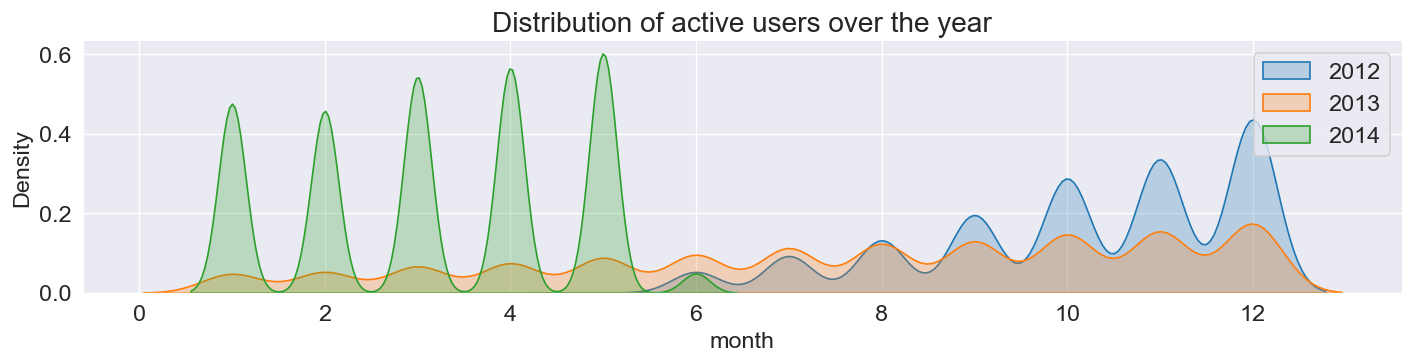

In [60]:
sns.FacetGrid(df2, hue='year', aspect=4).map(sns.kdeplot, 'month', shade=True)
plt.legend(labels=[2012, 2013, 2014])
plt.title("Distribution of active users over the year")
plt.show()

#### Adopted Users

In [61]:
# Total Number of adopted users
adopted_users_df.user_id.nunique()

1432

In [62]:
# Percentage of adopted users
round((adopted_users_df.user_id.nunique() / df1.object_id.nunique()) * 100, 2)

11.93

In [48]:
# Frequency in adopted user
adopted_users_df.freq.value_counts()

3    10255
4     7554
5     5535
7     5427
6     4196
Name: freq, dtype: int64

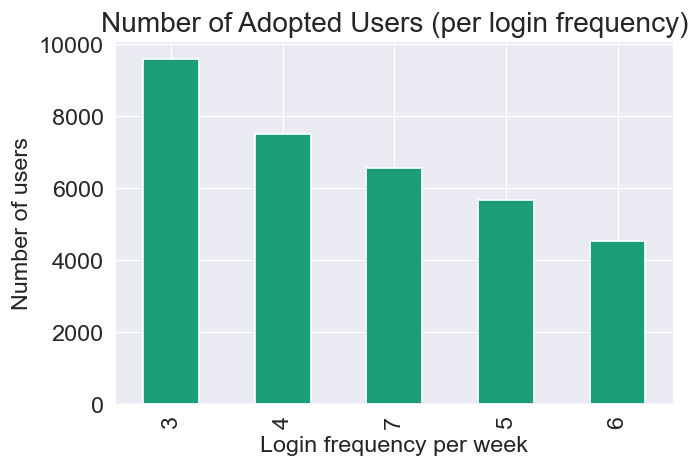

In [84]:
# Bar chart for adopted users
adopted_users_df.freq.value_counts().plot(kind='bar', stacked=True, colormap='Dark2')
plt.title("Number of Adopted Users (per login frequency)")
plt.xlabel("Login frequency per week")
plt.ylabel("Number of users")
plt.show()

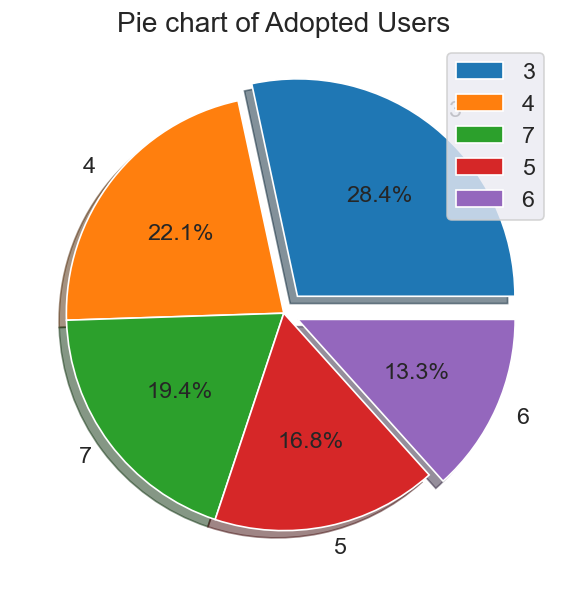

In [85]:
# Pie Chart for adopted Users
fig = plt.figure(figsize=(8,6))
adopted_users_df.freq.value_counts().plot(kind='pie', autopct='%1.1f%%', explode=(.1, 0, 0, 0, 0.07), shadow=True)
plt.title("Pie chart of Adopted Users")
plt.legend()
plt.ylabel('')
plt.show()

In [24]:
adopted_users_df

,year_week,user_id,time,freq
89,2012-24,728,16:04,3
182,2012-25,1693,21:58,3
204,2012-25,4835,03:07,3
315,2012-26,6171,02:05,3
340,2012-26,9312,11:49,3
...,...,...,...,...
69637,2014-22,11762,23:00,3
69639,2014-22,11806,09:48,3
69640,2014-22,11836,02:40,3
69644,2014-22,11895,04:14,4


In [82]:
adopted_users_df.columns

Index(['year_week', 'user_id', 'time', 'freq', 'time_period'], dtype='object')

In [104]:
period = adopted_users_df.time_period.value_counts().to_frame()
period.rename_axis(columns={'time_period': 'total_users'}, inplace=True)
period.reset_index(inplace=True)
period.rename_axis(columns={'index':'time_period'}, inplace=True)
period

,index,time_period
0,afternoon,4586
1,evening,4539
2,late evening - midnight,4490
3,early morning,4415
4,late morning,4154
5,midday-noon,4023
6,morning,3817
7,middle of night,3780


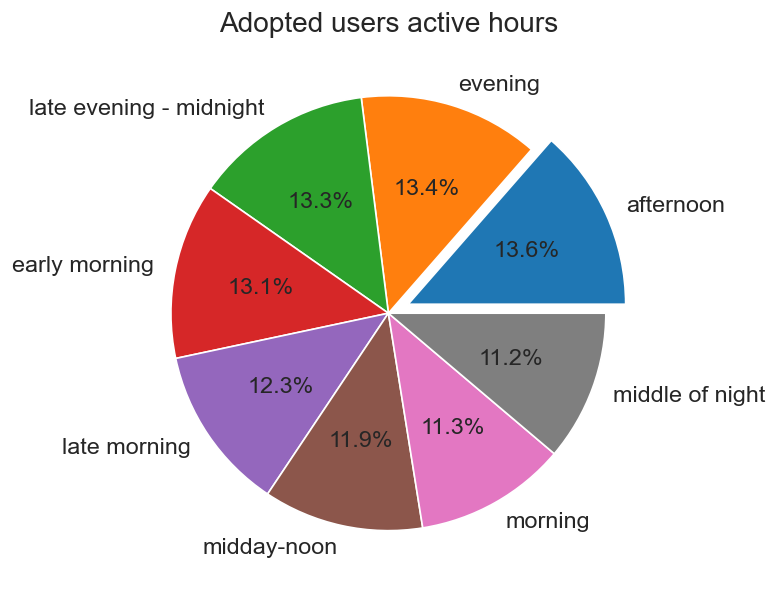

In [94]:
adopted_users_df.time_period.value_counts().plot(kind='pie', autopct="%1.1f%%", explode=(0.1, 0,0,0,0,0,0,0))
plt.title("Adopted users active hours")
plt.ylabel('');

## Insights from the User Engagement data:

---

1. There are 8823 (73.52%) active users, out of which 1432 (== 12%) are adopted users.
2. 28.4% adopted users visit the site 3 times in a week. Similarly, 22.1% visits 4 times, 19.4% visits 7 times and only 13.3% visits 6 times in a week. 